In [29]:
import numpy as np
import matplotlib.pyplot as plt

### K-Means

In [31]:
class K_means:
    def __init__(self, k, max_iterations=1000):
        self.k = k
        self.max_iterations = max_iterations

    def init_random_centroid(self, X):
        n_samples = X.shape[0]
        centroids = X[np.random.choice(n_samples, self.k, replace=False)]
        return centroids
    
    def closet_centroid(self, sample, centroids):
        closet_i = 0
        closet_dist = float('inf')
        for i, centroid in enumerate(centroids):
            distance = np.linalg.norm(sample - centroid)
            if distance < closet_dist:
                closet_i = i
                closet_dist = distance
        return closet_i
    
    def create_clusters(self, centroids, X):
        clusters = [[] for _ in range(3)]
        for sample_i, sample in enumerate(X):
            centroid_i = self.closet_centroid(sample, centroids)
            clusters[centroid_i].append(sample_i)
        return clusters
    
    def calculate_centroids(self, clusters, X):
        n_features = X.shape[1]
        centroids = np.zeros((self.k, n_features))
        for i, cluster in enumerate(clusters):
            centroid = np.mean(X[cluster], axis=0)
            centroids[i] = centroid
        return centroids
    
    def predict(self, X):
        centroids = self.init_random_centroid(X)

        for _ in range(self.max_iterations):
            clusters = self.create_clusters(centroids, X)
            prev_centroids = centroids
            centroids = self.calculate_centroids(clusters, X)
            diff = centroids - prev_centroids
            if not diff.any():
                break

        y_pred = np.zeros(X.shape[0])
        for cluster_i, cluster in enumerate(clusters):
            for sample_i in cluster:
                y_pred[sample_i] = cluster_i
        return y_pred

### Assignment 1 (4 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of intializing centroids randomly to the overall performance of K-means.

In [54]:
mean = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

X1 = np.random.multivariate_normal(mean[0], cov, 200)
X2 = np.random.multivariate_normal(mean[1], cov, 200)
X3 = np.random.multivariate_normal(mean[2], cov, 200)

X = np.concatenate((X1, X2, X3), axis=0)

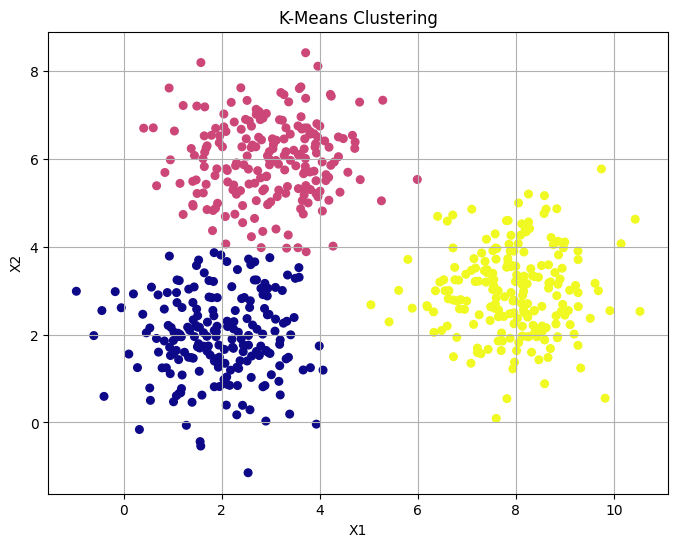

In [56]:
kmeans = K_means(k=3)
y_pred = kmeans.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred.astype(int), cmap='plasma', s=30)
plt.title("K-Means Clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

Khởi tạo các centroid ban đầu ngẫu nhiên ảnh hưởng đáng kể đến hiệu suất và kết quả của thuật toán K-means. Nếu các centroid được chọn gần đúng với vị trí trung tâm thật sự của cụm thì thuật toán sẽ hội tụ nhanh và cho kết quả phân cụm chính xác. Tuy nhiên vẫn có trường hợp chọn ngẫu nhiên có thể dẫn đến các centroid nằm gần nhau hoặc nằm trong cùng một cụm, khiến kết quả phân cụm không chính xác và làm chậm quá trình hội tụ. Ngoài ra, kết quả thuật toán có thể thay đổi mỗi lần chạy do sự khác biệt trong khởi tạo ban đầu. Do đó để cải thiện hiệu suất và độ ổn định, có thể chạy thuật toán nhiều lần rồi chọn kết quả tốt nhất.

### Assignment 2 (4 scores):
- Generate a toy dataset having $50$ points following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $20$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $1000$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of different sizes among clusters to the performance of K-means.

In [79]:
mean = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

X1 = np.random.multivariate_normal(mean[0], cov, 50)
X2 = np.random.multivariate_normal(mean[1], cov, 20)
X3 = np.random.multivariate_normal(mean[2], cov, 1000)

X = np.concatenate((X1, X2, X3), axis=0)

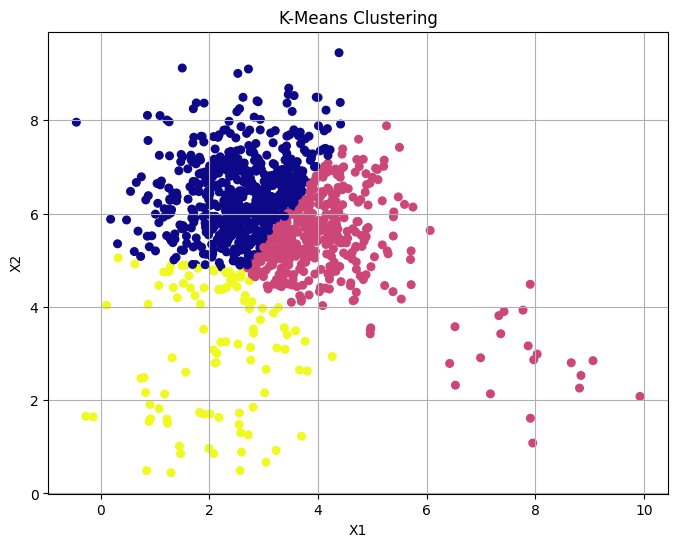

In [80]:
kmeans = K_means(k=3)
y_pred = kmeans.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred.astype(int), cmap='plasma', s=30)
plt.title("K-Means Clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

Khi các cụm có số lượng điểm dữ liệu chênh lệch quá lớn, thuật toán K-means sẽ dễ bị lệch về phía cụm lớn. Trong ví dụ này, cụm chứa 1000 điểm đã chi phối vị trí của centroid và làm sai lệch việc phân cụm cho các điểm ít hơn. Hậu quả là nhiều điểm của các cụm nhỏ (cụm 1 và 2) bị gán nhầm vào cụm lớn (cụm 3), dẫn đến kết quả phân cụm không chính xác.

Do đó, K-means hoạt động không hiệu quả khi dữ liệu có các cụm với kích thước chênh lệch lớn.

### Assignment 3 (2 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma_1)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma_1)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma_2)$ where 

$$
    \Sigma_1 = 
    \left(\begin{array}{cc}
        1 & 0 \\
        0 & 1
    \end{array}\right)
$$ 

and

$$
\Sigma_2 = 
    \left(\begin{array}{cc}
        10 & 0 \\
        0 & 1
    \end{array}\right)
$$.

- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of distribution $\mathcal{N}((3, 6), \Sigma_2)$ to the performance of K-means.

In [49]:
mean = [[2, 2], [8, 3], [3, 6]]
cov1 = [[1, 0], [0, 1]]   
cov2 = [[10, 0], [0, 1]]

X1 = np.random.multivariate_normal(mean[0], cov1, 200)
X2 = np.random.multivariate_normal(mean[1], cov1, 200)
X3 = np.random.multivariate_normal(mean[2], cov2, 200)

X = np.concatenate((X1, X2, X3), axis=0)

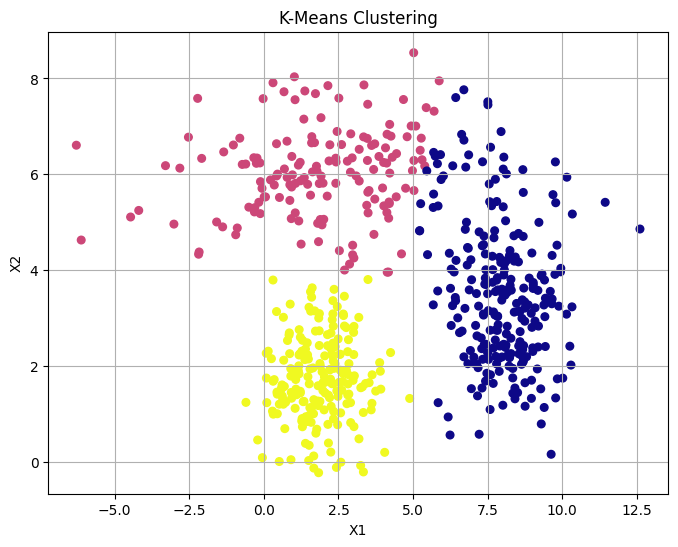

In [50]:
kmeans = K_means(k=3)
y_pred = kmeans.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred.astype(int), cmap='plasma', s=30)
plt.title("K-Means Clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

Trong ví dụ này, ba cụm dữ liệu có cùng số lượng điểm nhưng khác nhau về phân phối hiệp phương sai. Thuật toán K-means chỉ dựa vào khoảng cách Euclid để phân cụm và không xem xét đến hình dạng hay độ trải dài của cụm, do đó nó không xử lý tốt các cụm có phương sai lớn và không đồng đều. Hệ quả là cụm có phương sai lớn dễ gây sai lệch trong việc xác định ranh giới giữa các cụm, làm giảm độ chính xác của việc phân cụm.Do đó khi dữ liệu có sự khác biệt rõ rệt về phân phối như trong trường hợp này, K-means không còn là lựa chọn tối ưu.